In [11]:
import pandas as pd
import hashlib
from PIL import Image

In [15]:
def calc_md5(image_url: str):
    img = Image.open(f"./data/{image_url}")
    return hashlib.md5(img.tobytes()).hexdigest()

In [22]:
df = pd.read_csv("./export.csv")
df["md5"] = df.image_url.apply(calc_md5)
df = df.drop_duplicates(subset=["md5"])
df.head()

,image_url,label,md5
0,d6540236-5774-4375-8aad-53582b98bb32.jpeg,0,6191699ae559665d149117051c5a0889
1,db9f7f97-83ff-4629-af51-1710066d3b13.jpeg,0,43e57e275b11a4b5598a2b45bfceee5f
2,4243da34-6908-4296-95d2-e4d741e63c65.jpeg,1,659381b23d687bfb3a0f94073a4bb10a
3,44b0a168-495d-4579-a0f5-7832bf1f29ff.webp,0,04d80553a297a036ce6b90b83b5a5a56
4,7e1ffa0f-c6c1-44db-8f7d-32a5e58aaeed.jpeg,0,2b186584a1f668972a1b760312263be1


label
0    1608
1     181
Name: count, dtype: int64

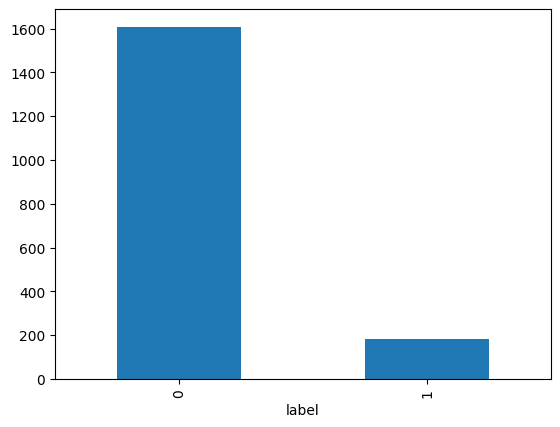

In [25]:
df = df.query("label != 2")
df.label.value_counts().plot.bar()
df.label.value_counts()

In [26]:
df.to_csv("cleaned_metadata.csv")